### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

$x_{n,1}$=age, $x_{n,2}$= year, $x_{n,3}$= number of axillary nodes

$t=1,2$ (survival, death)

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split

In [71]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [72]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [73]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

In [74]:
data=np.genfromtxt('haberman.data',delimiter=',')

In [75]:
t_raw = data[:,-1]%2
X_raw = data[:,:3]
t = to_binary(t_raw)
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

In [116]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(214, 4) (214, 2)
(92, 4) (92, 2)


### Set-up

$$\begin{aligned} \text{input: }&\quad \mathbf x=[x_1, \dots, x_k, 1]\\
\text{hidden layer: }& \quad  \mathbf x \mathbf w^{(1)}=[z_1, \dots , z_m]\\
 &  \phantom{LLLLLLLL}\text{with } \mathbf w^{(1)} \text{ of size } (k+1) \times m\\
& \quad \mathbf h=[h_1, \cdots , h_m, 1]\\ & \quad \phantom{\mathbf h} =[\sigma(z_1), \dots , \sigma(z_m), 1 ] \quad ( \sigma : \text{sigmoid})\\
\text{output: }&\quad \mathbf y=[y_1, \dots , y_s]= \pmb \sigma (\mathbf h \mathbf w^{(2)}) \quad ( \pmb \sigma : \text{softmax})\\ & \phantom{LLLLLLLL}\text{with } \mathbf w^{(2)} \text{ of size } (m+1) \times s \end{aligned}$$



### Formulas

$$ E(\mathbf w^{(1)}, \mathbf w^{(2)})= - \sum_{i=1}^s t_i \ln y_i $$

$$\nabla_{\mathbf w^{(2)}} E = \mathbf h^\top (\mathbf y- \mathbf t) $$

$$ \nabla E_{\mathbf w^{(1)}} = \mathbf x^T \ \left [ h_q(1-h_q) \sum_{j=1}^s (y_j -t_j)w_{qj}^{(2)} \right ]_{q=1, \dots , m} $$

In [180]:
k=3;m=4;s=2
w1=np.random.rand(k+1,m)*0.001; w2=np.random.rand(m+1,s)
eta=0.01
iter_num=100

In [149]:
def Er(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [150]:
def gradE(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    gw1=X_train.T@(h_o*(1-h_o)*((y-t_train)@(w2[:-1]).T))/N
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw2

In [181]:
gw1, gw2=gradE(w1,w2)
print("gw1=\n", gw1[:3], "\n","gw2=\n", gw2[:3])
w1-=eta*gw1; w2-=eta*gw2
print("w1=\n", w1[:3], "\n", "w2=\n",w2[:3])
Er(w1,w2)

gw1=
 [[ 0.83752713 -0.88505183  0.06051168 -0.32325087]
 [ 1.07376948 -1.13463231  0.07758032 -0.41441161]
 [-0.07083772  0.07485172 -0.00511962  0.02733373]] 
 gw2=
 [[ 0.06885015 -0.06885015]
 [ 0.06742874 -0.06742874]
 [ 0.06791611 -0.06791611]]
w1=
 [[-7.80485925e-03  8.97350623e-03  2.54259693e-04  3.63914565e-03]
 [-9.78209657e-03  1.20041158e-02 -5.00518153e-04  4.69268636e-03]
 [ 1.05210440e-03 -5.41552178e-05  1.11467890e-04  4.37966906e-04]] 
 w2=
 [[0.60242096 0.09089115]
 [0.04015026 0.58267653]
 [0.5209497  0.48528915]]


0.5847452448247014

In [152]:
def accuracy(w1,w2,X=X_test,t=t_test):
    h_o=sigmoid(X@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [182]:
for i in range(iter_num):
    gw1,gw2=gradE(w1,w2)
    w1-=eta*gw1; w2-=eta*gw2
    if i%10==0:
        print(i, '\t', Er(w1,w2), '\t', accuracy(w1,w2).round(2))

print(Er(w1,w2))

0.5803586869048717 	 72.83
0.575386029034777 	 72.83
0.5745586376244053 	 72.83
0.573897205846565 	 72.83
0.5730250079152581 	 72.83
0.5716570325996895 	 72.83
0.5696835458625482 	 72.83
0.5672993544847601 	 72.83
0.5646406013749129 	 72.83
0.5618649307301813 	 72.83
0.5593749558881415


In [183]:
accuracy(w1,w2,X_train,t_train)

73.83177570093459

# Classifying MNIST via Neural Networks
 
The **MNIST** (Modified National Institute of Standards and Technology) database is a large database of handwritten digits that is commonly used for training various image processing systems.

In [184]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from random import randint

In [185]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [186]:
data_raw.shape

(10000, 785)

In [187]:
data=data_raw[np.random.choice(data_raw.shape[0], 1000, replace=False)]

In [188]:
data.shape # 28 x 28 = 784

(1000, 785)

In [189]:
t_raw = data[:,0]
X_raw = data[:,1:]/255

In [190]:
t_raw[:10]

array([1., 8., 9., 5., 0., 3., 8., 7., 6., 2.])

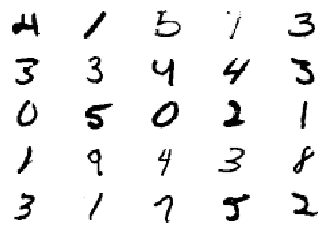

In [191]:
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(X_raw[randint(0, X_raw.shape[0])].reshape(28,28), cmap='Greys')

In [192]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [193]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0,0,0,0,0,0,0,0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

In [194]:
t = to_binary(t_raw)
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

In [195]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [322]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(700, 785) (700, 10)
(300, 785) (300, 10)


In [289]:
k=784;m=56;s=10
w1=np.random.rand(k+1,m)*0.00001; w2=np.random.rand(m+1,s)
eta=0.01
iter_num=5000

In [290]:
def Er(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [291]:
def gradE(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    gw1=X_train.T@(h_o*(1-h_o)*((y-t_train)@(w2[:-1]).T))/N
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw2

In [333]:
def accuracy(w1,w2,X=X_train,t=t_train):
    h_o=sigmoid(X@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [336]:
for i in range(iter_num):
    gw1,gw2=gradE(w1,w2)
    w1-=eta*gw1; w2-=eta*gw2
    if i%500==0:
        print(i, "\t", Er(w1,w2), "\t", accuracy(w1,w2).round(2))

print(Er(w1,w2))

0 	 0.20733157244589717 	 96.14
500 	 0.19702367197103116 	 96.29
1000 	 0.18743255134990347 	 96.43
1500 	 0.17848685401320402 	 96.57
2000 	 0.1701261074379554 	 96.71
2500 	 0.16229829843733484 	 97.14
3000 	 0.1549581593815317 	 97.43
3500 	 0.14806594584639102 	 97.71
4000 	 0.1415865273336398 	 97.86
4500 	 0.1354886740326113 	 98.14
0.12975562822885156


In [338]:
# Test accuracy
accuracy(w1,w2,X_test,t_test)

91.0

In [305]:
h_o=sigmoid(X_test@w1)
N=h_o.shape[0]
h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
y=musig(h@w2)
t_pred=to_binary(np.argmax(y,axis=1))

Prediction: 1


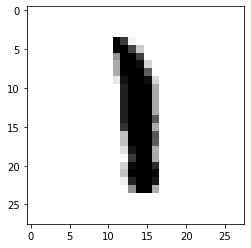

In [313]:
rd=randint(0,n_test)
plt.imshow(X_test[rd,:-1].reshape(28,28), cmap='Greys')
print('Prediction:', np.argmax(t_pred[rd]))

### TensorFlow and Keras

In [314]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/ten

In [315]:
model = Sequential()
model.add(Dense(units=56, activation='sigmoid', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 56)                43960     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                570       
Total params: 44,530
Trainable params: 44,530
Non-trainable params: 0
_________________________________________________________________


In [316]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [329]:
X_train_1=X_train[:,:-1]; X_test_1=X_test[:,:-1]
model.fit(X_train_1, t_train, batch_size=1, epochs=5)

Epoch 1/5
700/700 [==============================] - 0s 625us/step - loss: 0.4358 - accuracy: 0.9171
Epoch 2/5
700/700 [==============================] - 0s 535us/step - loss: 0.3958 - accuracy: 0.9300
Epoch 3/5
700/700 [==============================] - 0s 548us/step - loss: 0.3621 - accuracy: 0.9271
Epoch 4/5
700/700 [==============================] - 0s 520us/step - loss: 0.3331 - accuracy: 0.9429
Epoch 5/5
700/700 [==============================] - 0s 557us/step - loss: 0.3062 - accuracy: 0.9429


In [331]:
loss, accuracy  = model.evaluate(X_test_1, t_test)
print(f'Test accuracy: {accuracy:.3}')

300/300 [==============================] - 0s 118us/step
Test accuracy: 0.873


### Convolutional Neural Networks (CNN)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [12]:
data=data_raw[np.random.choice(data_raw.shape[0], 100, replace=False)]

In [13]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [15]:
def relu(x):
    return np.maximum(x,0)

In [16]:
def heaviside(x):
    y=np.empty(x.shape)
    y[x>=0]=1
    y[x<0]=0
    return y

In [17]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [18]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0,0,0,0,0,0,0,0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

In [19]:
t = to_binary(t_raw)
X = X_raw/255

In [20]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(70, 784) (70, 10)
(30, 784) (30, 10)


### Naive Approach

In [29]:
k=784; ker_size=2; m=81; s=10

In [37]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    X1=X.reshape((N,28,28))
    C=np.zeros((N,27,27))
    D=np.zeros((N,9,9))
    M=np.zeros((N,9,9))
    for i in range(N):
        for j in range(27):
            for k in range(27):
                C[i,j,k]=np.sum(X1[i,j:j+2,k:k+2]*w)  # convolution
        for j in range(9):
            for k in range(9):
                C_temp=C[i,3*j:3*j+3,3*k:3*k+3]   
                D[i,j,k]=np.max(C_temp)                   # pooling
                M[i,j,k]=np.argmax(C_temp)
    return D, M
    

In [38]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    d_temp, m_temp =convolution(w1)
    d_temp=d_temp.reshape(N,m)
    h_o=relu(w1_0+d_temp)   # activaiton
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [39]:
def gradE(w1,w1_0,w2,N=X_train.shape[0]):

    d_temp, m_temp =convolution(w1)
    d_temp=d_temp.reshape(N,m)
    h_o=relu(w1_0+d_temp)   #activation
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    g_i=heaviside(d_temp)*((y-t_train)@(w2[:-1]).T)
    
    gw1=np.zeros((2,2))
    for p in range(2):
        for q in range(2):
            x_i=np.zeros((N,m))
            for n in range(N):
                for a in range(9):
                    for b in range(9):
                        mask=m_temp[n,a,b]
                        mt=(mask%3).astype(int); ms=((mask-mt)/3).astype(int)
                        x_i[n,9*a+b]=X_train[n,28*(3*a+ms+p)+3*b+mt+q]
            gw1[p,q]=np.sum(g_i[:]*x_i[:])/N
    gw1_0=np.sum(g_i)/N 
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw1_0, gw2

In [43]:
def accuracy(w1,w1_0,w2, X=X_train,t=t_train):

    N=X.shape[0]
    d_temp, m_temp =convolution(w1,X=X,N=N)
    d_temp=d_temp.reshape(N,m)
    h_o=relu(w1_0+d_temp.reshape(N,81))
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [54]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.1
iter_num=100

In [55]:
for i in range(100):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%10==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(Er(w1,w1_0, w2))

0 	 2.2800754696619263 	 14.29
10 	 2.2585569395252882 	 14.29
20 	 2.17384571150822 	 25.71
30 	 1.7518105008894758 	 58.57
40 	 0.8917758105759511 	 94.29
50 	 0.4245700394263976 	 97.14
60 	 0.438082224329211 	 87.14
70 	 0.20420133040375463 	 97.14
80 	 0.10487503293872073 	 100.0
90 	 0.0782837879031477 	 100.0
0.06280849678090557


In [57]:
accuracy(w1,w1_0,w2,X_test,t_test)

76.66666666666667

In [154]:
gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
print("gw1=\n", gw1, "\n","gw2=\n", gw2[:2])
w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
print("\n\nw1_0=\n",w1_0)
print("w1=\n", w1, "\n", "w2=\n",w2[:2])
Er(w1,w1_0,w2)

gw1=
 [[ 0.00512786  0.0001767  -0.00346096 -0.00505256 -0.00304347]
 [ 0.00152437 -0.00576942 -0.01240063 -0.01294565 -0.00651878]
 [-0.00341653 -0.01110112 -0.01590557 -0.01411237 -0.01036118]
 [-0.00828668 -0.01422503 -0.01438154 -0.01083109 -0.00782587]
 [-0.00542008 -0.00763625 -0.00931737 -0.00451247 -0.00417576]] 
 gw2=
 [[ 4.78504382e-05  1.65752496e-03  5.43277020e-04 -8.79012040e-05
  -2.99473496e-05  5.71076893e-04 -1.13764405e-03 -2.69117281e-03
   1.65613501e-03 -5.29198903e-04]
 [ 3.86390000e-04  4.59194141e-03 -2.90174265e-04 -3.03121103e-03
  -7.71356617e-04  5.22629660e-03 -2.53918827e-03 -4.02263283e-03
   1.23495587e-03 -7.85020878e-04]]


w1_0=
 0.9261603208897742
w1=
 [[-0.03382956  0.20284274  0.376845    0.49533322  0.33134655]
 [ 0.09743253  0.39337128  0.68110564  0.78842874  0.54711311]
 [ 0.28794013  0.70371018  0.89703781  0.94678071  0.65799498]
 [ 0.43779914  0.72433319  0.92010296  0.83362247  0.56872323]
 [ 0.35867477  0.61413835  0.71366442  0.58761956 

0.20797471057049544

### Vectorization

In [104]:
data=data_raw[np.random.choice(data_raw.shape[0], 1000, replace=False)]

In [13]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [105]:
t = to_binary(t_raw)
X = X_raw/255

In [106]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(700, 784) (700, 10)
(300, 784) (300, 10)


In [107]:
i0=np.repeat(np.arange(2),2)
i1=np.repeat(np.arange(27),27)
j0=np.tile(np.arange(2),2)
j1=np.tile(np.arange(27),27)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [108]:
i_ind

array([[ 0,  0,  0, ..., 26, 26, 26],
       [ 0,  0,  0, ..., 26, 26, 26],
       [ 1,  1,  1, ..., 27, 27, 27],
       [ 1,  1,  1, ..., 27, 27, 27]])

In [109]:
j_ind

array([[ 0,  1,  2, ..., 24, 25, 26],
       [ 1,  2,  3, ..., 25, 26, 27],
       [ 0,  1,  2, ..., 24, 25, 26],
       [ 1,  2,  3, ..., 25, 26, 27]])

In [110]:
N=X_train.shape[0]
X1=X_train.reshape(N,28,28)
X1[:,i_ind,j_ind].shape

(700, 4, 729)

In [111]:
i0=np.repeat(np.arange(3),3)
i1=np.repeat(np.arange(9),9)
j0=np.tile(np.arange(3),3)
j1=np.tile(np.arange(9),9)
ci_ind=i0.reshape(-1,1)+3*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+3*j1.reshape(1,-1)

In [112]:
i0=np.arange(9)
x_ind=i0.reshape(-1,1)*81+i0.reshape(1,-1)*3
x_ind=x_ind.reshape(1,-1)

In [113]:
N=X_train.shape[0]
i0=np.repeat(np.arange(N),81)
N_ind=i0.reshape(N,81)

In [114]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    X1=X.reshape(N,28,28)

    C=w.reshape(1,-1)@X1[:,i_ind,j_ind]   # convolution
    C=C.reshape(N,27,27)[:,ci_ind,cj_ind]
    D=np.max(C,axis=1)      # pooling
    M=np.argmax(C,axis=1)
    return D, M
    

In [115]:
k=784; ker_size=2; m=81; s=10

In [116]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    d_temp, m_temp =convolution(w1)
    h_o=relu(w1_0+d_temp)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [117]:
def gradE(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):

    d_temp, m_temp =convolution(w1)
    h_o=relu(w1_0+d_temp)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    g_i=heaviside(d_temp)*((y-t_train)@(w2[:-1]).T)
    
    mm=9*m_temp-8*(m_temp%3)+x_ind
    X1=X.reshape(N,28,28)[:,i_ind,j_ind]
    X2=X1[N_ind,:,mm].transpose(0,2,1)
    gg=(g_i*X2.transpose(1,0,2)).transpose(1,0,2)
    gw1=np.sum(np.sum(gg,axis=0),axis=1)/N
    gw1=gw1.reshape(2,2)
    gw1_0=np.sum(g_i)/N 
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw1_0, gw2

In [118]:
def accuracy(w1,w1_0,w2,X=X_train,t=t_train):

    N=X.shape[0]
    d_temp, m_temp =convolution(w1,X,N=N)
    h_o=relu(w1_0+d_temp.reshape(N,81))
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [123]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.02
iter_num=100

In [126]:
for i in range(1000):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%100==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(Er(w1,w1_0, w2))

0 	 0.22935668527739775 	 93.86
100 	 0.21245739778021727 	 94.71
200 	 0.19773644823094108 	 95.43
300 	 0.1847181069476998 	 95.71
400 	 0.1730743618098681 	 96.29
500 	 0.1625640970391778 	 96.71
600 	 0.1530122496243397 	 97.14
700 	 0.14428644571125557 	 97.29
800 	 0.13627801441935872 	 97.71
900 	 0.12890116644533467 	 97.71
0.12215170353910995


In [127]:
accuracy(w1,w1_0,w2,X_test,t_test)

86.0

In [155]:
gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
print("gw1=\n", gw1, "\n","gw2=\n", gw2[:2])
w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
print("\n\nw1_0=\n",w1_0)
print("w1=\n", w1, "\n", "w2=\n",w2[:2])
Er(w1,w1_0,w2)

gw1=
 [[ 0.00510726  0.00017163 -0.00346024 -0.00504887 -0.00304015]
 [ 0.00152324 -0.00577006 -0.01239698 -0.01293803 -0.00650951]
 [-0.00341624 -0.01109483 -0.01589707 -0.01410315 -0.01035347]
 [-0.00828219 -0.01421718 -0.01437241 -0.01082358 -0.00781937]
 [-0.00541722 -0.00763219 -0.00931087 -0.00450638 -0.00416893]] 
 gw2=
 [[ 4.79880127e-05  1.65752731e-03  5.42187703e-04 -8.83345658e-05
  -2.96648798e-05  5.70894539e-04 -1.13702690e-03 -2.68929519e-03
   1.65506735e-03 -5.29343376e-04]
 [ 3.86392414e-04  4.58946640e-03 -2.91002628e-04 -3.03278856e-03
  -7.70756990e-04  5.22494519e-03 -2.53716734e-03 -4.01843661e-03
   1.23452340e-03 -7.85175289e-04]]


w1_0=
 0.926185713754617
w1=
 [[-0.0339317   0.20283931  0.37691421  0.4954342   0.33140736]
 [ 0.09740207  0.39348669  0.68135358  0.7886875   0.5472433 ]
 [ 0.28800846  0.70393208  0.89735575  0.94706278  0.65820205]
 [ 0.43796478  0.72461753  0.92039041  0.83383894  0.56887962]
 [ 0.35878312  0.61429099  0.71385064  0.58770969  

0.20783446185730944